## Imports

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## Read data

In [27]:

dfvith = pd.read_csv('../ExperimentData/AmgEvaluationData/Sam1_VitH_best_config_results.csv')
dfsmall21 = pd.read_csv('../ExperimentData/AmgEvaluationData/Sam2_hieraS2.1_best_config_results.csv')
dfvith_def = pd.read_csv('../ExperimentData/AmgEvaluationData/Sam1_VitH_def_config_results.csv')
dfsmall21_def = pd.read_csv('../ExperimentData/AmgEvaluationData/Sam2_hieraS2.1_def_config_results.csv')

df_best = pd.concat([dfvith, dfsmall21], ignore_index=True)
df_def = pd.concat([dfvith_def, dfsmall21_def], ignore_index=True)
df_best['settings'] = 'best'
df_def['settings'] = 'default'
df = pd.concat([df_best, df_def], ignore_index=True)

rename_dict = {'sam_vit_h_4b8939.pth': ' SAM 1 vit h',
                'sam2.1_hiera_small.pt': 'SAM 2.1 small',}

df_best['model'] = df_best['model'].replace(rename_dict)
df['model'] = df['model'].replace(rename_dict)
df.to_csv('AMGexpDEFandBESTconfigRESULTS.csv', index=False)
print(df_best.columns)


                                        

Index(['recall', 'precision', 'predictions', 'ground_truth', 'TP', 'FP', 'FN',
       'mean_iou_of_tp', 'std_iou_of_tp', 'Dataset', 'img_dir', 'model',
       'points_per_side', 'points_per_batch', 'pred_iou_thresh',
       'stability_score_thresh', 'stability_score_offset', 'box_nms_thresh',
       'crop_n_layers', 'crop_nms_thresh', 'crop_n_points_downscale_factor',
       'f_beta', 'error', 'settings'],
      dtype='object')


## PLotting

In [32]:
def _draw_text(ax, x, y, text):
    if not pd.isna(text):
        ax.text(x, y, text, horizontalalignment='center', size='medium', color='black', weight='semibold')

def get_box_plot(df, xkey, ykey, colour_key):
   
    sign_letters = [['a', 'b'], ['c', 'd']]
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure(dpi=300, figsize=(3*0.8, 5*0.8))
    ax = sns.boxplot(data=df, x=xkey, y=ykey, hue=colour_key,  flierprops={"marker": ".", "markerfacecolor": "white", "markersize": 4})
    ax.set_ylim(-0.03, 1.13)
    ax.set_ylabel("$\mathit{F}$($\\beta$ = 2) per image")
    ax.set_xlabel('')
    ax.legend(title='Parameters', loc='lower left')
    for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
         
        _draw_text(ax, tick-0.8*0.25 , 1.05, sign_letters[tick][0])
        _draw_text(ax, tick+0.8*0.25 , 1.05, sign_letters[tick][1])

                        count      mean       std       min       25%  \
model         settings                                                  
 SAM 1 vit h  best       10.0  0.925735  0.029960  0.878939  0.906048   
              default    10.0  0.865858  0.022024  0.827740  0.857188   
SAM 2.1 small best       10.0  0.735307  0.120383  0.415973  0.739042   
              default    10.0  0.049159  0.043752  0.000000  0.005297   

                             50%       75%       max  
model         settings                                
 SAM 1 vit h  best      0.926358  0.950588  0.968013  
              default   0.867561  0.880807  0.892256  
SAM 2.1 small best      0.766968  0.799283  0.829384  
              default   0.045776  0.089696  0.106383  


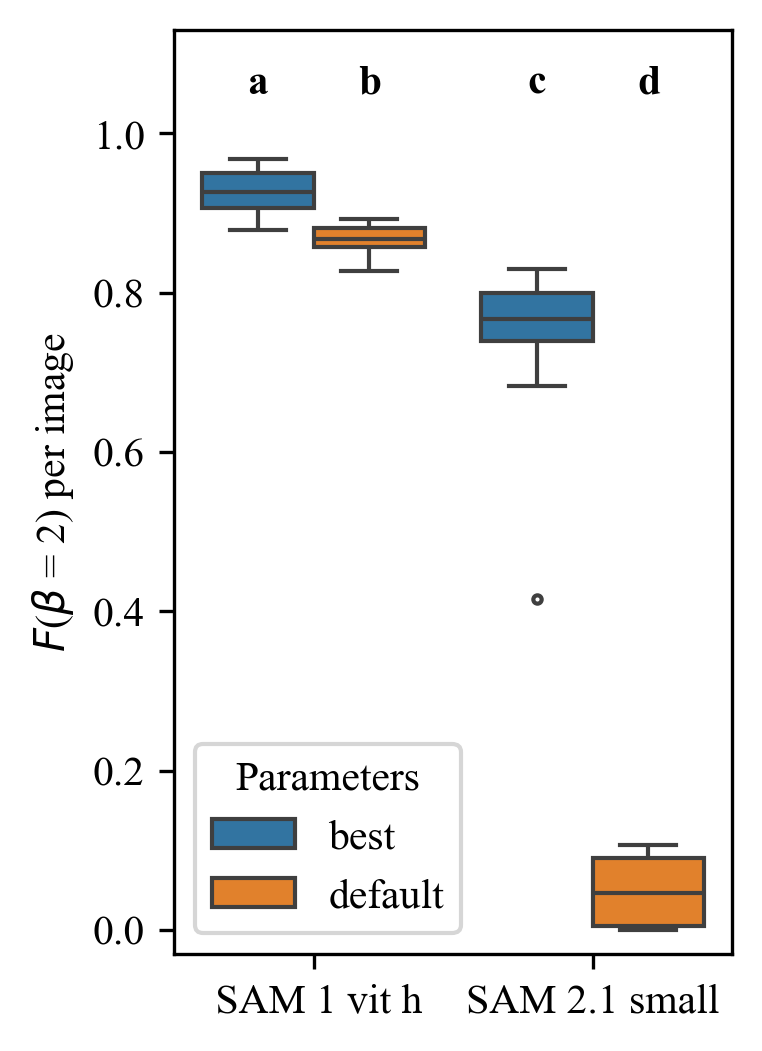

In [33]:
print(df.groupby(['model', 'settings'])["f_beta"].describe())
get_box_plot(df, 'model', 'f_beta', 'settings')